In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/PRML

/content/drive/MyDrive/PRML


In [ ]:
# example of a CNN model with an identity or projection residual module
# Example of creating a CNN model with a VGG block
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.utils import plot_model, to_categorical
from keras.layers import BatchNormalization
from tensorflow.keras import activations, layers
from keras.layers import GlobalAveragePooling2D
#from tflearn.layers.core import input_data, dropout, fully_connected
from keras.layers import Dense
from keras.layers import Activation

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
#from keras.utils import to_categorical
from keras.models import Sequential
#from keras.layers import Conv2D
#from keras.layers import MaxPooling2D
#from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import add

In [ ]:
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters, strides=(1,1)):
  bn_axis = 3
  conv1 = Conv2D(n_filters, (3,3), strides=strides, padding='same', kernel_initializer='he_normal')(layer_in)
  conv1a = BatchNormalization(axis=bn_axis)(conv1)
  conv1a = Activation('relu')(conv1a)
  # conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', kernel_initializer='he_normal')(conv1a)
  conv2 = BatchNormalization(axis=bn_axis)(conv2)
  if strides==(1,1):
    conv2 = add([layer_in, conv2])
  else:
    conv2 = add([conv1, conv2])
  conv2 = Activation('relu')(conv2)
  return conv2

In [ ]:
# define model for ResNet with n=3
visible = Input(shape=(32, 32, 3))

layer = Conv2D(16, (3,3), padding='same')(visible)
layer = BatchNormalization()(layer)
layer = (layers.Activation(activations.relu))(layer)

layer = residual_module(layer, 16)
layer = residual_module(layer, 16)
layer = residual_module(layer, 16)

layer = residual_module(layer, 32, strides=(2,2))
layer = residual_module(layer, 32)
layer = residual_module(layer, 32)

layer = residual_module(layer, 64, strides=(2,2))
layer = residual_module(layer, 64)
layer = residual_module(layer, 64)

layer = GlobalAveragePooling2D()(layer)
layer = Dense(10, activation='softmax')(layer)

# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='residual_module.png')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_148 (Conv2D)             (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_148 (BatchN (None, 32, 32, 16)   64          conv2d_148[0][0]                 
__________________________________________________________________________________________________
activation_148 (Activation)     (None, 32, 32, 16)   0           batch_normalization_148[0][0]    
____________________________________________________________________________________________

In [ ]:
# define model for ResNet with n=5
visible = Input(shape=(32, 32, 3))
layRes =Conv2D(16, (3,3),strides=(1, 1), padding='same')(visible)
layRes = BatchNormalization()(layRes)
layRes = (layers.Activation(activations.relu))(layRes)

layRes = residual_module(layRes, 16)
layRes = residual_module(layRes, 16)
layRes = residual_module(layRes, 16)
layRes = residual_module(layRes, 16)
layRes = residual_module(layRes, 16)


layRes = residual_module(layRes, 32, strides=(2,2))
layRes = residual_module(layRes, 32)
layRes = residual_module(layRes, 32)
layRes = residual_module(layRes, 32)
layRes = residual_module(layRes, 32)

layRes = residual_module(layRes, 64, strides=(2,2))
layRes = residual_module(layRes, 64)
layRes = residual_module(layRes, 64)
layRes = residual_module(layRes, 64)
layRes = residual_module(layRes, 64)

layRes = GlobalAveragePooling2D()(layRes)
layRes = Dense(10, activation='softmax')(layRes)
# create model
model1 = Model(inputs=visible, outputs=layRes)
# summarize model
model1.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='residual_module.png')

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_167 (Conv2D)             (None, 32, 32, 16)   448         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_167 (BatchN (None, 32, 32, 16)   64          conv2d_167[0][0]                 
__________________________________________________________________________________________________
activation_167 (Activation)     (None, 32, 32, 16)   0           batch_normalization_167[0][0]    
____________________________________________________________________________________________

In [ ]:
# define model for ResNet with n=7
visible = Input(shape=(32, 32, 3))
layerRes =Conv2D(16, (3,3),strides=(1, 1), padding='same')(visible)
layerRes = BatchNormalization()(layerRes)
layerRes = (layers.Activation(activations.relu))(layerRes)
#######
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)
layerRes = residual_module(layerRes, 16)


layerRes = residual_module(layerRes, 32, strides=(2,2))
layerRes = residual_module(layerRes, 32)
layerRes = residual_module(layerRes, 32)
layerRes = residual_module(layerRes, 32)
layerRes = residual_module(layerRes, 32)
layerRes = residual_module(layerRes, 32)
layerRes = residual_module(layerRes, 32)

layerRes = residual_module(layerRes, 64, strides=(2,2))
layerRes = residual_module(layerRes, 64)
layerRes = residual_module(layerRes, 64)
layerRes = residual_module(layerRes, 64)
layerRes = residual_module(layerRes, 64)
layerRes = residual_module(layerRes, 64)
layerRes = residual_module(layerRes, 64)

layerRes = GlobalAveragePooling2D()(layerRes)
layerRes = Dense(10, activation='softmax')(layerRes)
# create model
model2 = Model(inputs=visible, outputs=layerRes)
# summarize model
model2.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='residual_module.png')

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_198 (Conv2D)             (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_198 (BatchN (None, 32, 32, 16)   64          conv2d_198[0][0]                 
__________________________________________________________________________________________________
activation_198 (Activation)     (None, 32, 32, 16)   0           batch_normalization_198[0][0]    
____________________________________________________________________________________________

In [ ]:
# define model for ResNet with n=9
visible = Input(shape=(32, 32, 3))
layerResNet =Conv2D(16, (3,3),strides=(1, 1), padding='same')(visible)
layerResNet = BatchNormalization()(layerResNet)
layerResNet = (layers.Activation(activations.relu))(layerResNet)
#######
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)
layerResNet = residual_module(layerResNet, 16)


layerResNet = residual_module(layerResNet, 32, strides=(2,2))
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)
layerResNet = residual_module(layerResNet, 32)

layerResNet = residual_module(layerResNet, 64, strides=(2,2))
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)
layerResNet = residual_module(layerResNet, 64)

layerResNet = GlobalAveragePooling2D()(layerResNet)
layerResNet = Dense(10, activation='softmax')(layerResNet)
# create model
model3 = Model(inputs=visible, outputs=layerResNet)
# summarize model
model3.summary()
# plot model architecture
#plot_model(model3, show_shapes=True, to_file='residual_module3.png')

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_241 (Conv2D)             (None, 32, 32, 16)   448         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_241 (BatchN (None, 32, 32, 16)   64          conv2d_241[0][0]                 
__________________________________________________________________________________________________
activation_241 (Activation)     (None, 32, 32, 16)   0           batch_normalization_241[0][0]    
____________________________________________________________________________________________

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


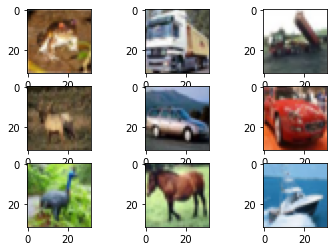

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
print(trainy)
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
opt = SGD(lr=0.1, momentum=0.9)

In [ ]:
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
model1.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
model2.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
model3.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
# plot diagnostic learning curves
import numpy as np
def summarize_diagnostics(history,history1,history2,history3):
  pyplot.title('Error')
  
  pyplot.plot((1-np.array(history.history['accuracy']))*100,'g-', label='train 20-layer')
  pyplot.plot((1-np.array(history.history['val_accuracy']))*100,'g--', label='test 20-layer')
  pyplot.plot((1-np.array(history1.history['accuracy']))*100,'b-', label='train 32-layer')
  pyplot.plot((1-np.array(history1.history['val_accuracy']))*100,'b--', label='test 32-layer')
  pyplot.plot((1-np.array(history2.history['accuracy']))*100,'r-', label='train 44-layer')
  pyplot.plot((1-np.array(history2.history['val_accuracy']))*100,'r--', label='test 44-layer')
  #pyplot.plot((1-np.array(history3.history['accuracy']))*100,'k-', label='train 56-layer')
  #pyplot.plot((1-np.array(history3.history['val_accuracy']))*100,'k--', label='test 56-layer')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  #pyplot.savefig(filename + '_plot.png')
  pyplot.xlabel('Epoch',fontsize=12)
  pyplot.ylabel('Error(%)',fontsize=12)
  pyplot.legend()
  pyplot.grid(color='y')
  pyplot.figure(1,dpi=120)
  pyplot.show()

In [ ]:

trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)

In [ ]:
epoch = 15

In [ ]:
history = model.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
loss_history = (1-np.array(history.history['accuracy']))*100
loss_history_test = (1-np.array(history.history['val_accuracy']))*100
numpy_loss_history = np.array(loss_history)
numpy_loss_history_test = np.array(loss_history_test)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history1.csv", numpy_loss_history)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history2.csv", numpy_loss_history_test)
#model.save("/content/drive/MyDrive/PRML/my_model.h5")

# _, acc = model.evaluate(testX, testY, verbose=0)
#print('> %.3f' % (loss_history * 100.0))

Epoch 1/15
391/391 [==============================] - 35s 84ms/step - loss: 0.0866 - accuracy: 0.2602 - val_loss: 0.0899 - val_accuracy: 0.2175
Epoch 2/15
391/391 [==============================] - 32s 82ms/step - loss: 0.0665 - accuracy: 0.4680 - val_loss: 0.0763 - val_accuracy: 0.3842
Epoch 3/15
391/391 [==============================] - 32s 83ms/step - loss: 0.0586 - accuracy: 0.5438 - val_loss: 0.0710 - val_accuracy: 0.4435
Epoch 4/15
391/391 [==============================] - 32s 83ms/step - loss: 0.0533 - accuracy: 0.5923 - val_loss: 0.0713 - val_accuracy: 0.4399
Epoch 5/15
391/391 [==============================] - 32s 83ms/step - loss: 0.0482 - accuracy: 0.6381 - val_loss: 0.0675 - val_accuracy: 0.4831
Epoch 6/15
391/391 [==============================] - 32s 83ms/step - loss: 0.0446 - accuracy: 0.6717 - val_loss: 0.0539 - val_accuracy: 0.5912
Epoch 7/15
391/391 [==============================] - 32s 83ms/step - loss: 0.0422 - accuracy: 0.6897 - val_loss: 0.0470 - val_accuracy:

TypeError: ignored

In [ ]:
#from tensorflow import keras
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/PRML/my_model.h5")
#reconstructed_history = reconstructed_model.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history_1 = (1-np.array(reconstructed_history.history['accuracy']))*100
#numpy_loss_history_1 = np.array(loss_history_1)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history2.csv", numpy_loss_history_1)
#reconstructed_model.save("/content/drive/MyDrive/PRML/my_model1.h5")


In [ ]:
#from tensorflow import keras
#reconstructed_model_1 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1.h5")
#reconstructed_history_1 = reconstructed_model_1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history_2 = (1-np.array(reconstructed_history_1.history['accuracy']))*100
#numpy_loss_history_2 = np.array(loss_history_2)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history3.csv", numpy_loss_history_2)

In [ ]:
history1 = model1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
loss_history1 = (1-np.array(history1.history['accuracy']))*100
loss_history1_test = (1-np.array(history1.history['val_accuracy']))*100
numpy_loss_history1 = np.array(loss_history1)
numpy_loss_history1_test = np.array(loss_history1_test)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history3.csv", numpy_loss_history1)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history4.csv", numpy_loss_history1_test)
#model1.save("/content/drive/MyDrive/PRML/my_model1_2.h5")

Epoch 1/15
391/391 [==============================] - 55s 133ms/step - loss: 0.0966 - accuracy: 0.2302 - val_loss: 0.0799 - val_accuracy: 0.3203
Epoch 2/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0667 - accuracy: 0.4636 - val_loss: 0.0706 - val_accuracy: 0.4444
Epoch 3/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0584 - accuracy: 0.5486 - val_loss: 0.0817 - val_accuracy: 0.3763
Epoch 4/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0529 - accuracy: 0.5977 - val_loss: 0.0635 - val_accuracy: 0.5009
Epoch 5/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0484 - accuracy: 0.6379 - val_loss: 0.0564 - val_accuracy: 0.5788
Epoch 6/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0446 - accuracy: 0.6688 - val_loss: 0.0558 - val_accuracy: 0.5707
Epoch 7/15
391/391 [==============================] - 51s 131ms/step - loss: 0.0411 - accuracy: 0.6978 - val_loss: 0.0588 - val_ac

In [ ]:
#from tensorflow import keras
#reconstructed_model1 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_2.h5")
#reconstructed_history1 = reconstructed_model1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history1_1 = (1-np.array(reconstructed_history1.history['accuracy']))*100
#numpy_loss_history1_1 = np.array(loss_history1_1)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history5.csv", numpy_loss_history1_1)
#reconstructed_model1.save("/content/drive/MyDrive/PRML/my_model1_3.h5")


In [ ]:
#from tensorflow import keras
#reconstructed_model1_1 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_3.h5")
#reconstructed_history1_1 = reconstructed_model1_1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history1_2 = (1-np.array(reconstructed_history1_1.history['accuracy']))*100
#numpy_loss_history1_2 = np.array(loss_history1_2)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history6.csv", numpy_loss_history1_2)

In [ ]:
history2 = model2.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
loss_history2 = (1-np.array(history2.history['accuracy']))*100
loss_history2_test = (1-np.array(history2.history['val_accuracy']))*100
numpy_loss_history2 = np.array(loss_history2)
numpy_loss_history2_test = np.array(loss_history2_test)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history5.csv", numpy_loss_history2)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history6.csv", numpy_loss_history2_test)
#model2.save("/content/drive/MyDrive/PRML/my_model1_4.h5")

Epoch 1/15
391/391 [==============================] - 77s 185ms/step - loss: 0.0896 - accuracy: 0.2543 - val_loss: 0.0760 - val_accuracy: 0.3657
Epoch 2/15
391/391 [==============================] - 71s 181ms/step - loss: 0.0656 - accuracy: 0.4781 - val_loss: 0.0757 - val_accuracy: 0.4073
Epoch 3/15
391/391 [==============================] - 71s 181ms/step - loss: 0.0574 - accuracy: 0.5554 - val_loss: 0.0790 - val_accuracy: 0.4190
Epoch 4/15
391/391 [==============================] - 71s 181ms/step - loss: 0.0511 - accuracy: 0.6096 - val_loss: 0.0556 - val_accuracy: 0.5769
Epoch 5/15
391/391 [==============================] - 71s 181ms/step - loss: 0.0466 - accuracy: 0.6521 - val_loss: 0.0514 - val_accuracy: 0.6163
Epoch 6/15
391/391 [==============================] - 71s 182ms/step - loss: 0.0424 - accuracy: 0.6842 - val_loss: 0.0667 - val_accuracy: 0.5003
Epoch 7/15
391/391 [==============================] - 71s 181ms/step - loss: 0.0393 - accuracy: 0.7125 - val_loss: 0.0540 - val_ac

In [ ]:
####reconstructed_model2######
#from tensorflow import keras
#reconstructed_model2 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_4.h5")
#reconstructed_history2 = reconstructed_model2.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history2_1 = (1-np.array(reconstructed_history2.history['accuracy']))*100
#numpy_loss_history2_1 = np.array(loss_history2_1)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history8.csv", numpy_loss_history2_1)
#reconstructed_model2.save("/content/drive/MyDrive/PRML/my_model1_5.h5")

In [ ]:
##########reconstructed_model2_1#########
#from tensorflow import keras
#reconstructed_model2_1 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_5.h5")
#reconstructed_history2_1 = reconstructed_model2_1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history2_2 = (1-np.array(reconstructed_history2_1.history['accuracy']))*100
#numpy_loss_history2_2 = np.array(loss_history2_2)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history9.csv", numpy_loss_history2_2)

In [ ]:
history3 = model3.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
loss_history3 = (1-np.array(history3.history['accuracy']))*100
loss_history3_test = (1-np.array(history3.history['val_accuracy']))*100
numpy_loss_history3 = np.array(loss_history3)
numpy_loss_history3_test = np.array(loss_history3_test)
#print('> %.3f' % (loss_history3 * 100.0))
#np.savetxt("/content/drive/MyDrive/PRML/loss_history7.csv", numpy_loss_history3)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history8.csv", numpy_loss_history3_test)
#model3.save("/content/drive/MyDrive/PRML/my_model1_6.h5")

Epoch 1/15
391/391 [==============================] - 96s 233ms/step - loss: 0.0979 - accuracy: 0.2324 - val_loss: 0.0834 - val_accuracy: 0.2772
Epoch 2/15
391/391 [==============================] - 90s 229ms/step - loss: 0.0716 - accuracy: 0.4191 - val_loss: 0.0890 - val_accuracy: 0.3037
Epoch 3/15
391/391 [==============================] - 90s 231ms/step - loss: 0.0646 - accuracy: 0.4907 - val_loss: 0.0640 - val_accuracy: 0.4960
Epoch 4/15
391/391 [==============================] - 90s 229ms/step - loss: 0.0548 - accuracy: 0.5796 - val_loss: 0.0559 - val_accuracy: 0.5655
Epoch 5/15
391/391 [==============================] - 90s 229ms/step - loss: 0.0491 - accuracy: 0.6302 - val_loss: 0.0600 - val_accuracy: 0.5549
Epoch 6/15
391/391 [==============================] - 90s 229ms/step - loss: 0.0445 - accuracy: 0.6686 - val_loss: 0.0495 - val_accuracy: 0.6280
Epoch 7/15
391/391 [==============================] - 89s 228ms/step - loss: 0.0404 - accuracy: 0.7045 - val_loss: 0.0501 - val_ac

In [ ]:
############reconstructed_model3##########
#from tensorflow import keras
#reconstructed_model3 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_6.h5")
#reconstructed_history3 = reconstructed_model3.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history3_1 = (1-np.array(reconstructed_history3.history['accuracy']))*100
#numpy_loss_history3_1 = np.array(loss_history3_1)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history11.csv", numpy_loss_history3_1)
#reconstructed_model3.save("/content/drive/MyDrive/PRML/my_model1_7.h5")

In [ ]:
############reconstructed_model3_1###########
#from tensorflow import keras
#reconstructed_model3_1 = keras.models.load_model("/content/drive/MyDrive/PRML/my_model1_7.h5")
#reconstructed_history3_1 = reconstructed_model3_1.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#loss_history3_2 = (1-np.array(reconstructed_history3_1.history['accuracy']))*100
#numpy_loss_history3_2 = np.array(loss_history3_2)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history12.csv", numpy_loss_history3_2)

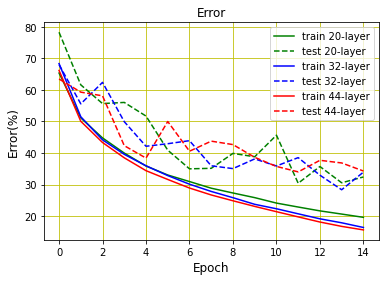

In [ ]:
summarize_diagnostics(history,history1,history2,history3)

In [ ]:
#print(history)